In [1]:
import tensorflow as tf
from Parsing import *
from matplotlib import pyplot as plt

# Load in the data
**`(data being image paths and annotations)`**

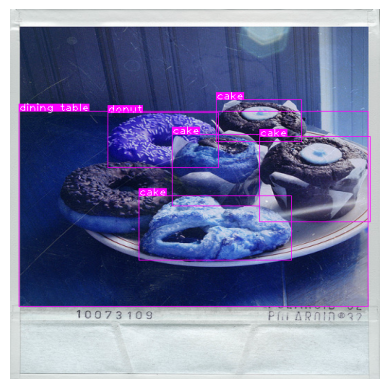

In [20]:
# Configurables for data importing
IMAGE_SIZE = (512, 512)


from functools import reduce
from typing import cast
from random import choice
from cv2 import imread, IMREAD_COLOR, resize, Mat
from Displaying import draw_obj

def process_image (filePath:str) -> Mat:
    img0 = imread(filePath, IMREAD_COLOR)
    img1 = cast(Mat, resize(img0, IMAGE_SIZE))
    return img1

imageList_val = get_image_list('val')
imageList_train = get_image_list('train')

objectList_val = get_objects('val')
objectList_train = get_objects('train')

rand_id = choice(list(imageList_val.keys()))
rand_img = reduce(
    lambda img,obj: draw_obj(img, obj),
    [o for o in objectList_val.values() if o.image.id == rand_id],
    process_image("Data/val2017/"+imageList_val[rand_id].fileName)
)
plt.imshow(rand_img)
plt.axis('off')
plt.show()

# Configure the data into input&target tensors

In [ ]:

from numpy import float32

def get_y_value_val (id):
    rect = objectList_val[id].boundingBox
    return tf.constant(rect, shape=(4,), dtype=float32)

xy_val = tf.data.Dataset.from_generator((
    (process_image("Data/val2017/"+img.fileName), get_y_value_val(img.id))
    for img in imageList_val.values()
))
# xy_val = xy_val.shuffle(256)


# Build the Model

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the Model

In [ ]:
# Configurables for training
EPOCHS = 2
INITIAL_EPOCH = 1

model.fit(
    x = x_train,
    y = None,
    epochs = EPOCHS,
    validations_data = x_val,
    initial_epoch = INITIAL_EPOCH
)